(lectures:nonlinear-susceptibility)=
# The Nonlinear Susceptibility

We have already seen that the displacement of the electron cloud relative to the nucleus can be a nonlinear function of an applied electric field.  The most frequently used strategy to express this nonlinear relationship is writing down the resulting polarization of the atoms $\mathbf{P}$ (which is proportional to the distance from equilibrium) as power series expansion of the external field $E(t)$ (which is proportion to the external force). Since the electric field can be a function of time, the polarization is also a function of time.
\begin{align}
P(t) & = \epsilon_0 \left[ \chi^{(1)} E(t) + \chi^{(2)} E^2(t) + \chi^{(3)} E^3(t) + \dots \right] \nonumber \\
& \equiv P^{(1)}(t) +  P^{(2)}(t) + P^{(3)}(t) + \dots
\end{align}

The term $\chi^{(1)}$ is the linear susceptibility, while $\chi^{(2)}$ and $\chi^{(3)}$ are the second- and third-order nonlinear susceptibilities.  Since $P(t) = qr(t)/V$, this equation means that when an electric field $E(t)$ is applied over some volume $V$, the equilibrium separation between the nucleus and electron cloud will be $r(t) = P(t)V/q$.  The susceptibility has units of $(\text{m}/\text{V})^{n-1}$.

## Mass-Spring System Analogy

To gain some familiarity with the nonlinear susceptibility in atoms, let's return to our mass-spring system analogy, recalling that an atom can be modeled as a mass spring system where the restoring force is due to the electric field of the electron cloud.  If the restoring force is proportional to the displacement (Hooke's law), we have

\begin{align}
m \ddot{r} = -k_1r
\end{align}

where $m$ is the mass and $k_1$ is the Hooke's law constant (stiffness) of the spring.

This equation has a simple solution:

\begin{align}
r = A\cos(\omega_0t + \phi)
\end{align}

where $\omega_0 = \sqrt{k/m}$ is the natural angluar frequency, $A$ is the amplitude of oscillation, and $\phi$ is a phase angle.  We incorporate nonlinearity into the system by adding terms to the right hand side that are nonlinear in $r$.  For example, let's add in a force term that is propotional to $r^2$:

\begin{align}
m \ddot{r} = -k_1r + k_2r^2
\end{align}

Let's see numerically how this affects the motion of the mass.  We'll solve this differential equation numerically and then plot the position of the mass as a function of time.  We'll also take the Fourier tranform to see what spectral components are introduced because of the nonlinearity.


In [30]:
import numpy as np
from scipy.constants import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as ipw
from scipy import integrate
from scipy.fft import fft, fftfreq
from scipy.signal import blackman
%matplotlib notebook

<IPython.core.display.Javascript object>


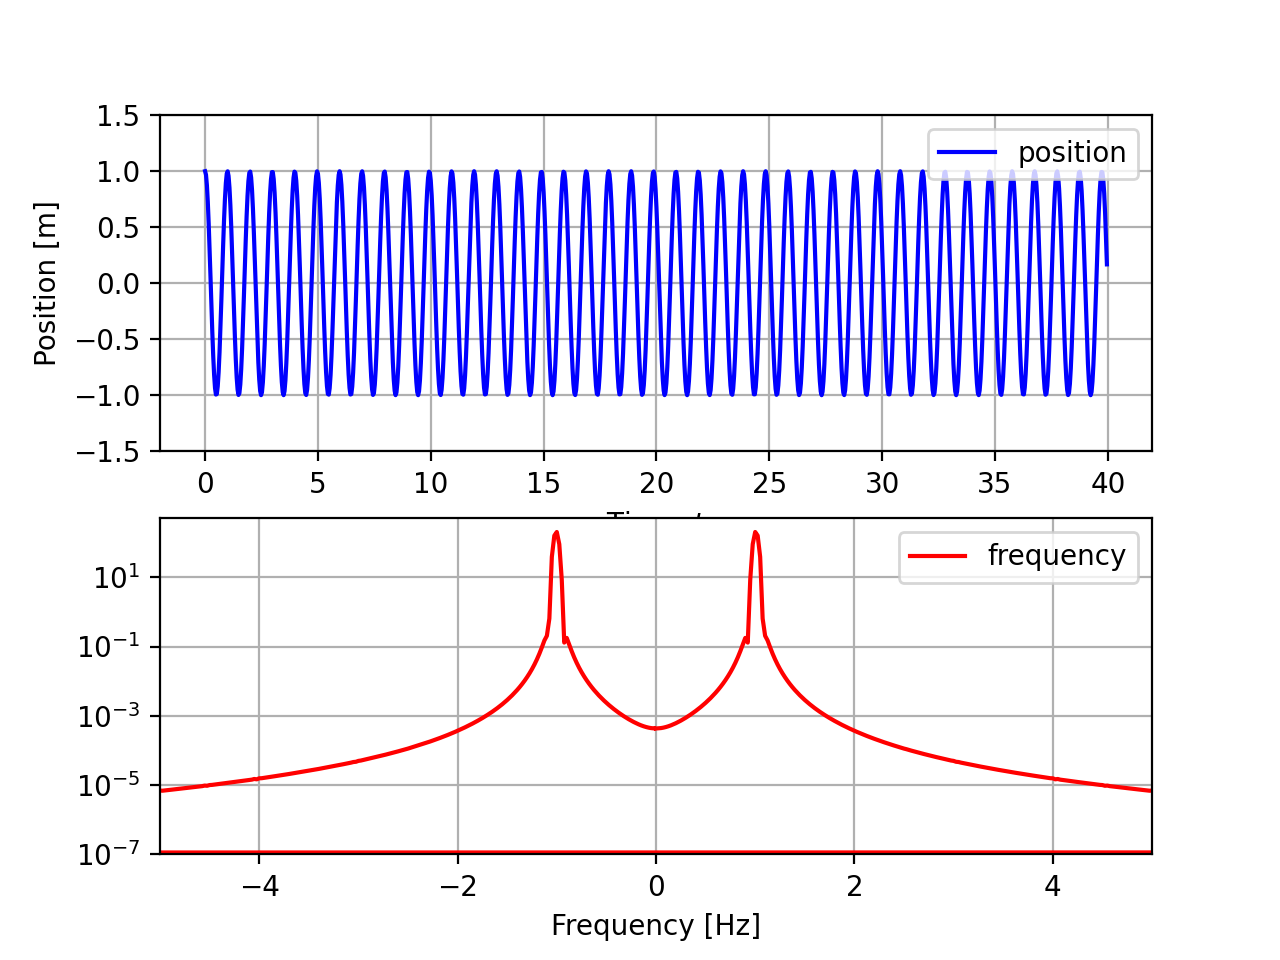

interactive(children=(FloatSlider(value=40.0, description='k1', min=10.0), FloatSlider(value=0.0, description=…

In [31]:
def ode(R, t, k1, k2):
    r, dotr = R
    ddotr = -k1*r + k2*r**2
    return [dotr, ddotr]

def update(k1 = 40, k2 = 0):
    
    sol = integrate.odeint(ode, R0, t, args = (k1, k2))
    line0.set_ydata(sol[:,0])
    fft_sol = fft(w*sol[:,0])
    line1.set_ydata(np.abs(fft_sol))

R0 = [1, 0.]   
Nt = 1000
t0 = 0
tf = 40
dt = (tf - t0)/(Nt)
fft_fre = fftfreq(n=Nt, d=dt)
w = blackman(Nt)

t = np.arange(t0,tf,dt)
dummy_sol = np.zeros_like(t)
dummy_fre = np.zeros_like(fft_fre)
fig, (ax1, ax2) = plt.subplots(2,1)
line0, = ax1.plot(t, dummy_sol, label = 'position', color = 'blue')
line1, = ax2.semilogy(fft_fre, dummy_fre, label = 'frequency', color = 'red')
ax1.grid()
ax1.set_xlabel("Time, $t$")
ax1.set_ylabel("Position [m]")
ax1.set_ylim(-1.5, 1.5)
ax1.legend()

ax2.grid()
ax2.set_xlabel("Frequency [Hz]")
ax2.set_xlim(-5, 5)
ax2.set_ylim(1E-7, Nt/2)
ax2.legend()



ipw.interact(update, k1 = (10, 100, 0.1), k2 = (0., 10., 0.01));
    

## Excercises
1. What extra frequency components do you notice when $k_2$ is nonzero?  Why do they appear?
2. Modify the numerical simulation of the anharmonic oscillator above to include a third force term that is proportional to the 3rd power of the displacement.  What additional frequency components appear?
3. Add a third subplot showing the potential energy of the mass as a function of displacement.  It should look like a parabola when $k_2=0$.  Animate it so that you can see how it changes with increasing $k_2$.


So we can see numerically that the nonlinear restoring force introduces extra frequency components in the *natural* response of the oscillating mass.  From the perspective of potential energy, this means that the potential energy well is no longer parabolic, just like we saw with the Hydrogen atom.  Now what happens if we add an external *driving* force?  We'll also include some damping to account for the fact that the mass loses energy when it oscillates.

<IPython.core.display.Javascript object>


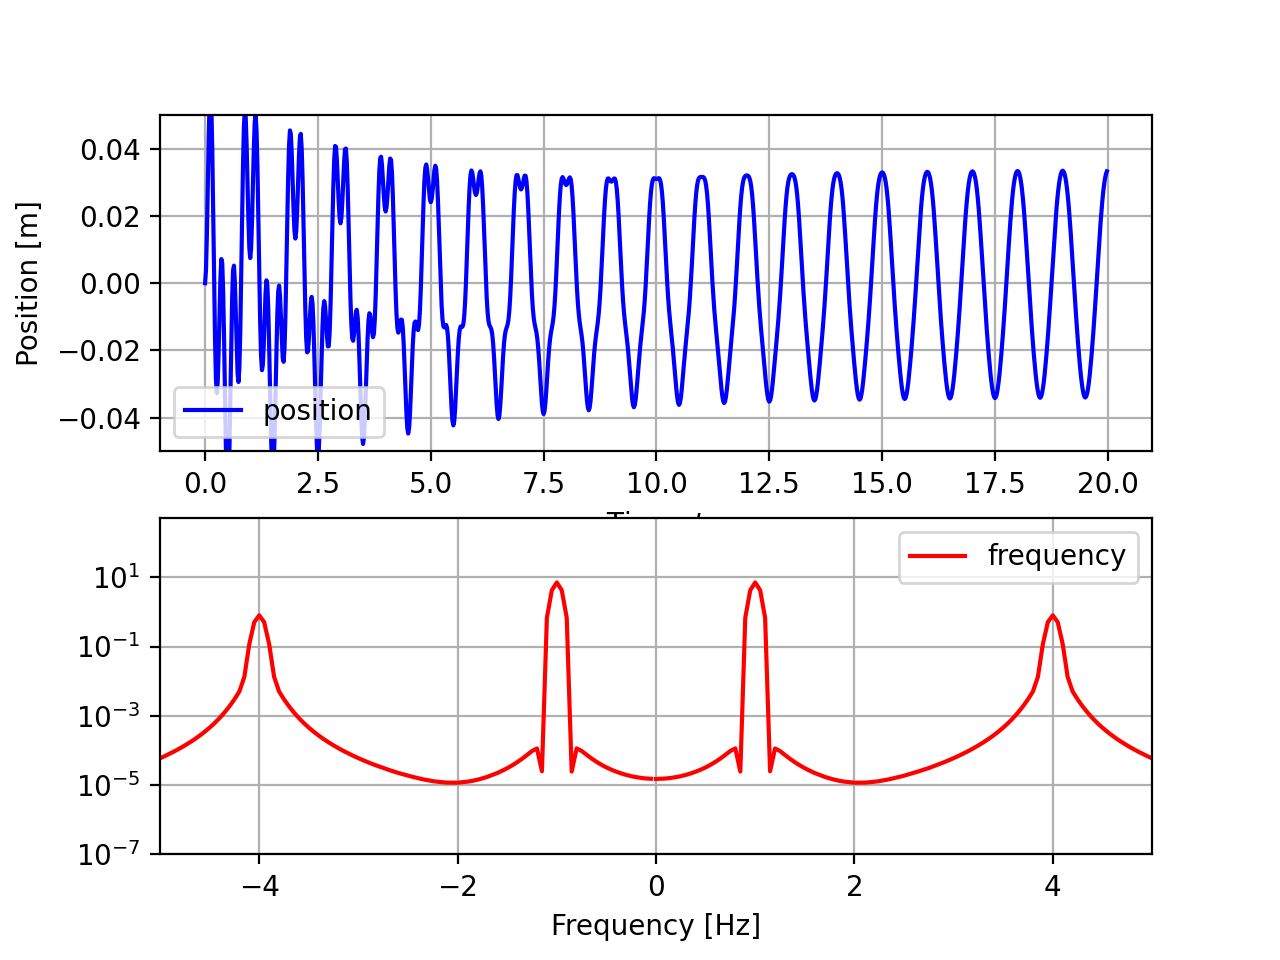

interactive(children=(FloatSlider(value=631.6546816697189, description='k1', max=986.9604401089358, min=39.478…

In [5]:
def ode(R, t, k1, k2):
    r, dotr = R
    F = A*np.cos(2*pi*fd*t)
    ddotr = -k1/m*r + k2/m*r**2 -g*dotr + F/m
    return [dotr, ddotr] 

def update(k1 = 4**2*(2*pi)**2, k2 = 0):
    
    sol = integrate.odeint(ode, R0, t, args = (k1, k2))
    line0.set_ydata(sol[:,0])
    fft_sol = fft(w*sol[:,0])
    line1.set_ydata(np.abs(fft_sol))
    
R0 = [0., 0.] 
m = 1
g = 0.5 #damping coefficient
fd = 1
A = 20
Nt = 1000
t0 = 0
tf = 20
dt = (tf - t0)/(Nt)
fft_fre = fftfreq(n=Nt, d=dt)
w = blackman(Nt)

t = np.arange(t0,tf,dt)
dummy_sol = np.zeros_like(t)
dummy_fre = np.zeros_like(fft_fre)
fig, (ax1, ax2) = plt.subplots(2,1)
line0, = ax1.plot(t, dummy_sol, label = 'position', color = 'blue')
line1, = ax2.semilogy(fft_fre, dummy_fre, label = 'frequency', color = 'red')
ax1.grid()
ax1.set_xlabel("Time, $t$")
ax1.set_ylabel("Position [m]")
ax1.set_ylim(-0.05, 0.05)
ax1.legend()

ax2.grid()
ax2.set_xlabel("Frequency [Hz]")
ax2.set_xlim(-5, 5)
ax2.set_ylim(1E-7, Nt/2)
ax2.legend()



ipw.interact(update, k1 = (1**2*(2*pi)**2, 5**2*(2*pi)**2, 0.1), k2 = (0., 10., 0.01));


It turns out that the 2nd order nonlinear restoring force not only adds a frequency response at twice the natural frequency, but it also adds a response at twice the driving frequency!  We know that oscillating electrons produce their own radiation (hence the damping), so if we can make this nonlinearity large enough,  we should be able to detect a doubled frequency component coming from atoms with a second order nonlinear susceptibility.  Note also that the amount of frequency conversion depends on the value of $k_2$, and not very much on $k_1$.

## Excercise
1. Set the linear and nonlinear restoring force equal to zero,  but leave the driving force.  What does the frequency response look like?  How about with only the nonlinear restoring force?
2. Bonus (not required, harder).  Instead of $k_1$ and $k_2$, use the potential energy model for the Hydrogen atom in the last notebook to see how its electron cloud oscillates when driven by an oscillating electric field.  Can we predict $\chi^{(1)}$ and $\chi^{(3)}$ from this?

## A concrete nonlinear optics example
In 1961, a group of researchers at the University of Michigan focused an optical beam from the newly developed ruby laser (invented the year before) onto a quartz crystal plate, and achieved the first-ever second-harmonic generation.  You can read the original paper here: [P. A. Franken, A. E. Hill, C. W. Peters, and G. Weinreich
Phys. Rev. Lett. 7, 118 (1961)](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.7.118)

In their experiment, the electric field of the focused laser oscillated according to $E = A\cos \omega t$, with $A \approx 1000$ V/m and $\omega = 2\pi \times 432 \text{ rad}/\text{s}$, corresponding to 694.3 nm.  This sounds like a very large frequency, but it is actually much slower than the natural oscillation frequency of the electrons in the quartz, so the displacement of the electrons pretty much followed the oscillating field.

The displacement of the electrons creates a dipole moment $p$ per atom, or equivalently a linear polarization of $P^{(1)} = Np$, where $N$ is the atomic number density of quartz.  Because of their knowledge of the crystal structure of quartz and their previous experiments with piezoelectricy, the researchers hypothesized that
quartz should have a 2nd order nonlinear polarization in addition to the linear term.  Including that nonlinear term, we can write the polarization mathematically as

\begin{align}
P(t) = \epsilon_0 \left( \chi^{(1)} A\cos\omega t + \chi^{(2)}A^2\cos^2\omega t \right)
\end{align}

The linear suceptibility is related to the refractive index by $\chi^{(1)} = n^2 - 1$ = 1.37 for quartz, and the 2nd order nonlinear susceptibility of quartz is $\chi^{(2)}= 0.46\times10^{-12}\text{ m}/\text{V}$.  The Michigan researchers didn't know this number at the time, but they suspected something close based on their experience with quartz piezoelectricity.  

Putting in these numbers we arrive at

\begin{align}
P(t) &= \epsilon_0 \left( (1.37)(1000)\cos\omega t + 0.46\times10^{-12}(1000)^2\cos^2\omega t \right) \nonumber \\ &= \epsilon_0 \left( 1370\cos\omega t + 0.46\times10^{-6}\frac{1}{2}(1+ \cos2\omega t) \right)
\end{align}

Let's pause and notice a couple things here:
1. The magnitude of the polarization oscillating at $2\omega$ is about $10^{10}$ times smaller than the polarization oscillating at $\omega$, even with a highly focused laser!
2. There is a term that is not oscillating at all!  This is called optical rectification.  Did you see this in the simulations of the mass spring system as well?

With these numbers they managed to show the first ever frequency doubling of an optical field.  They measured it by looking at the relative intensities on photographic plates.  The input light at 694.3 nm was dark red and the newly generated light at 347.15 nm was dark blue.  In the ultimate irony, when they sent the image of the photographic plate to the journal for publication, the spot corresponding to the doubled frequency was so dim that the editor thought it was a smudge, and so removed it prior to publication!  Check out the publication to see an arrow pointing to a non-existent spot showing the 2nd harmonic generation.  

## Excercises
1. Make a plot of the magnitude of the linear and 2nd order polarization in quartz as a function of electric field strength for quartz.
2. The Michigan researchers used a newly developed laser capable of field strengths of 1000 V/m.  Daniel Smalley has a Sprit One Laser from Spectra Physics.  Here's the datasheet: [Spirit One Datasheet](https://www.spectra-physics.com/mam/celum/celum_assets/resources/SpiritOne-Datasheet.pdf?3).  What kind of of 2nd order polarization in quartz could you get using this laser?  Assume you can focus down to a few microns.
3. Most modern frequency doubling commercial products use BBO or LBO crystals instead of quartz.  How much larger is $\chi^{(2)}$ in these crystals compared to quartz? 

## Generating light from nonlinear polarization

Even though each of the individual atoms in the quartz crystal has an oscillation at $2\omega$ that is much smaller than that at $\omega$, that doesn't necessarily mean the fields produced by the atoms two frequencies will be in that ratio.  What kind of electric field is produced by the oscillating atoms.  Well, there is an enormous number of atoms in the crystal oscillating back and forth.  The fields from each of these act like a dipole antenna, but when combined can behave like a phased array of antennas  whose fields constructively interfer and emit light in the forward direction.  When this happens, the field produced is $N$ times larger thn that of any individual atom, and hence the intensity is $N^2$ times larger!

The forward fields produced at $\omega$ and $2\omega$ by the atoms will be coupled together by a wave equation.  Which wave equation?  Maxwell's equations!  In order to find out how much of each frequency is produced, we must solve the Maxwell wave equations, using the nonlinear polarizations instead of the typical linear polarizations you have seen until now.  There are therefore 2 tasks that will comprise most of the course:

1. Find the nonlinear susceptibilities.
2. Put them into Maxwell's equations and solve for the fields produced.

Lot of special types of effects will be considered.  We'll give an overview of them in the next notebook.


